In [4]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Underfitting and Overfitting: KNN

Analyze data bankloan.csv
* Apply KNN Classifier
    * target : default
    * features : employ, debtinc, creddebt, othdebt
* Using different k (1,3,5,...100) : Apply scaling and Validate the model using accuracy in 20% testing data and 80% training data
* compare accuracies obtained from training data and testing data


## Dataset: Bankloan

In [7]:
bankloan=pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [9]:
x= bankloan[['employ','debtinc','creddebt','othdebt']]
y=bankloan['default']

In [27]:
x

,employ,debtinc,creddebt,othdebt
0,17,9.3,11.359392,5.008608
1,10,17.3,1.362202,4.000798
2,15,5.5,0.856075,2.168925
3,15,2.9,2.658720,0.821280
4,2,17.3,1.787436,3.056564
...,...,...,...,...
695,6,4.6,0.262062,0.979938
696,6,11.5,0.369495,2.045505
697,15,7.6,0.491264,1.940736
698,19,8.4,2.302608,4.165392


## Data Splitting

In [12]:
x_train,x_test, y_train, y_test= train_test_split(
    x,
    y,
    stratify=y,
    random_state=2020,
    test_size=.2
)

## Scaling

In [15]:
scaler= MinMaxScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [ ]:
scaler.fit(x_train)
scaler.transform (x_train)
scaler.transform(x_test)

## Model Performance in difference K

In [30]:
k= range(1,350,2)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in k:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    
    y_predict_train=knn.predict(x_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= knn.predict(x_test_scaled)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_k=i

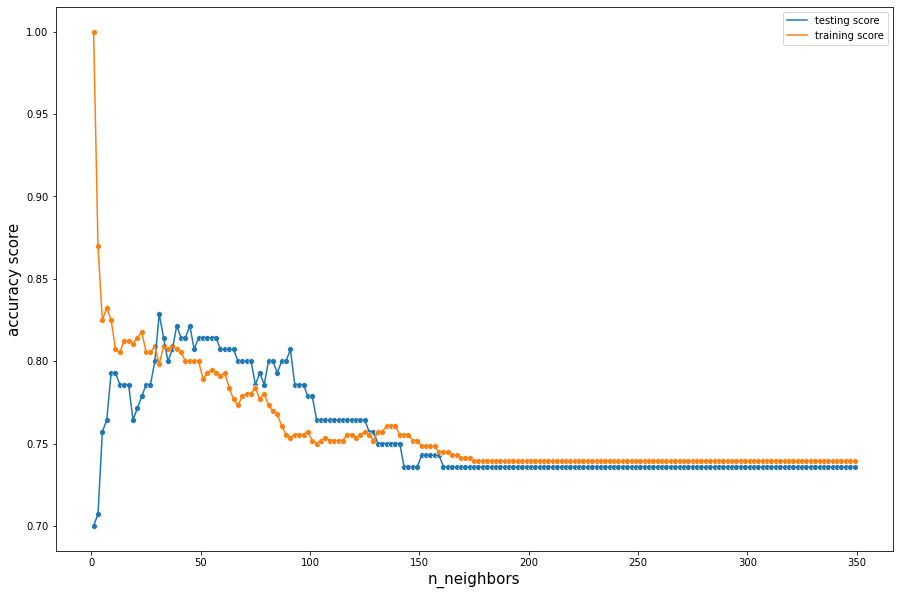

In [32]:
plt.figure(figsize=(15,10))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)

sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)

plt.legend(['testing score', 'training score'])
plt.xlabel('n_neighbors', size=15)
plt.ylabel('accuracy score', size=15)
plt.show()

In [33]:
print('best k:', best_k)
print('accuracy:', score )

best k: 31
accuracy: 0.8285714285714286


ketika k di bawah 31, ada kecenderungan overfitting, ketika k di atas 31, ada kecenderungan underfitting

# Model Complexity: Decision Tree

Analyze data bankloan.csv
* Apply Decision Tree Classifier
    * target : default
    * features : employ, debtinc, creddebt, othdebt
* Using different maximum depth of the tree (1,2,3,...25) : Validate the model using accuracy in 20% testing data and 80% training data
* compare accuracies obtained from training data and testing data
* you may try another hyperparameter such as minimum samples split, minimum samples leaf, etc.


## Model Perfromance with different Maximum depth

In [37]:
depth= range(1,25)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in depth:
    tree= DecisionTreeClassifier(max_depth=i, criterion='entropy')
    tree.fit(x_train,y_train)
    
    y_predict_train= tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= tree.predict(x_test)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        best_depth=i
        score=acc_score

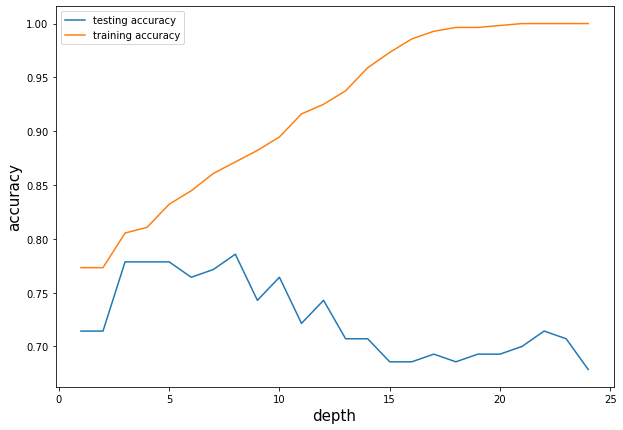

In [40]:
plt.figure(figsize=(10,7))
sns.lineplot(depth,testing_accuracy)
sns.lineplot(depth,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xlabel('depth', size=15)
plt.ylabel('accuracy', size=15)
plt.show()

In [41]:
print('best depth', best_depth)
print('score', score)

best depth 8
score 0.7857142857142857


Semakin tinggi max depth, semakin tinggi kecenderungan untuk overfitting. ketika max depth= 25. kita bisa lihat performa model di data training hampit 100%, tetapi performa model di data test rendah.

In [43]:
tree= DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [44]:
from sklearn.tree import plot_tree

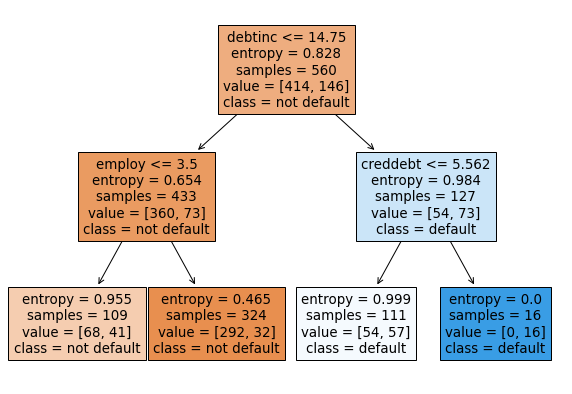

In [46]:
plt.figure(figsize=(10,7))
plot_tree(tree,feature_names=list(x), class_names=['not default', 'default'], filled=True)
plt.show()

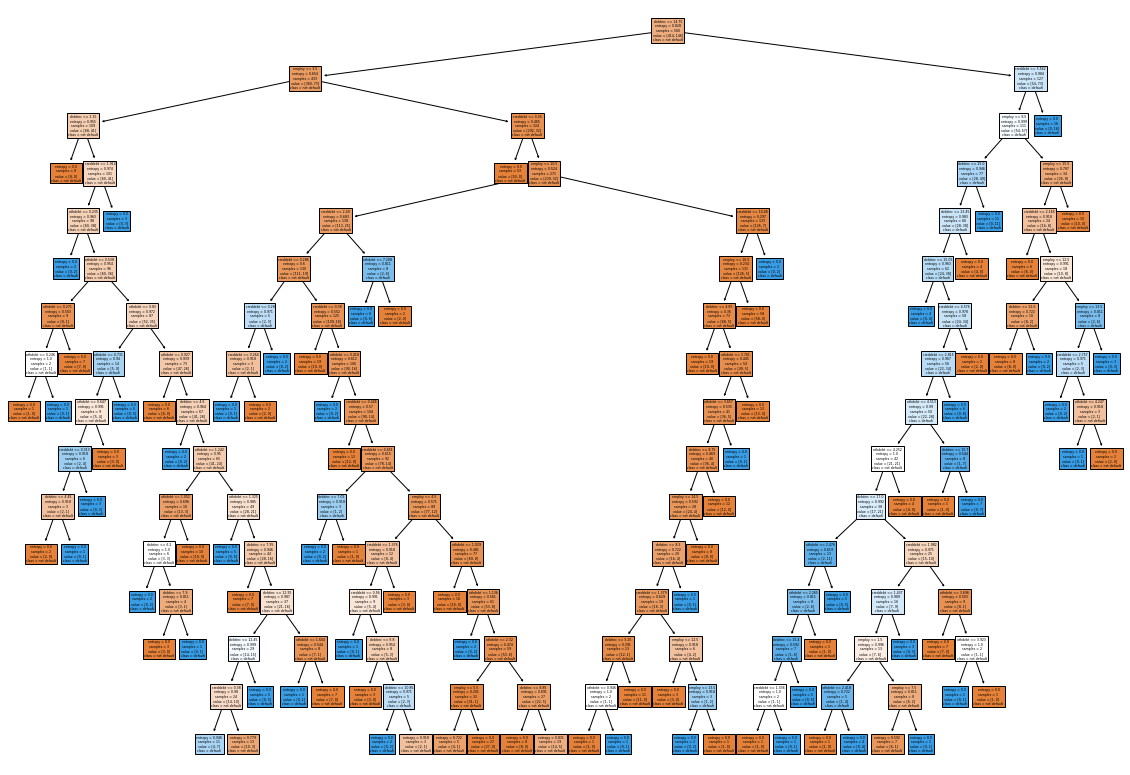

In [49]:
tree= DecisionTreeClassifier(max_depth=15, criterion='entropy')
tree.fit(x_train,y_train)

plt.figure(figsize=(20,14))
plot_tree(tree,feature_names=list(x), class_names=['not default', 'default'], filled=True)
plt.show()

semakin tinggi max depth, semakin kompleks model yang dibuat

# Exercise

dengan data bankloan, coba analisa performa model (overfitting, underfitting, sweet spot) dengan beragam nilai hyperparameter (jelaskan juga apa yang dilakukan hyperparameter tersebut):
    * minimum samples split (min_samples_split)
    * minimum samples leaf (min_samples_leaf)

In [65]:
split= range(2,150)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in split:
    tree= DecisionTreeClassifier(min_samples_split=i, criterion='entropy')
    tree.fit(x_train,y_train)
    
    y_predict_train= tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= tree.predict(x_test)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        best_split=i
        score=acc_score

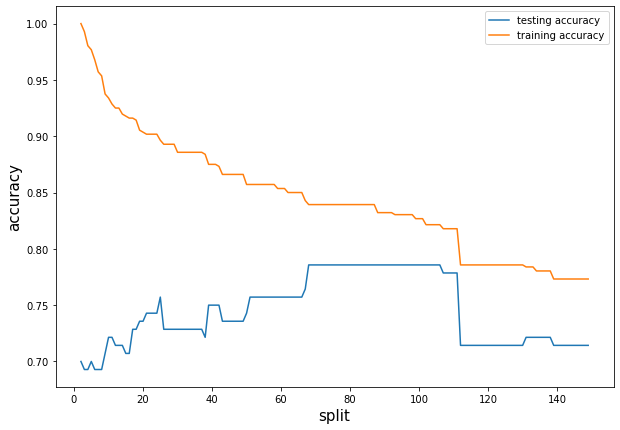

In [66]:
plt.figure(figsize=(10,7))
sns.lineplot(split,testing_accuracy)
sns.lineplot(split,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xlabel('split', size=15)
plt.ylabel('accuracy', size=15)
plt.show()

In [67]:
print('best split', best_split)
print('best score', score)

best split 68
best score 0.7857142857142857


In [62]:
leaf= range(1,150)
testing_accuracy=[]
training_accuracy=[]
score=0

for i in leaf:
    tree= DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy')
    tree.fit(x_train,y_train)
    
    y_predict_train= tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test= tree.predict(x_test)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score<acc_score:
        best_leaf=i
        score=acc_score

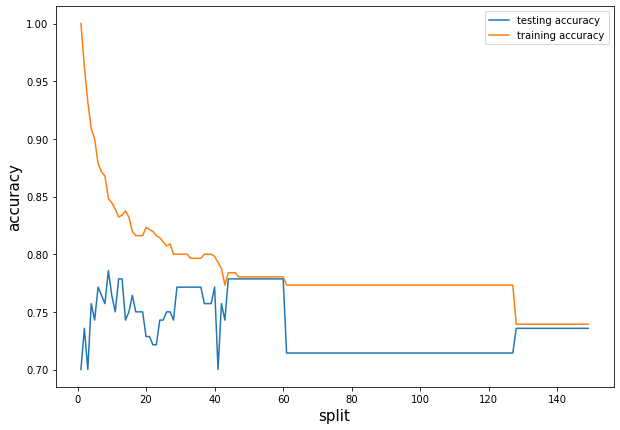

In [63]:
plt.figure(figsize=(10,7))
sns.lineplot(leaf,testing_accuracy)
sns.lineplot(leaf,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xlabel('split', size=15)
plt.ylabel('accuracy', size=15)
plt.show()

In [64]:
print('best leaf', best_leaf)
print('score',score)

best leaf 9
score 0.7857142857142857
